<a href="https://colab.research.google.com/github/JavierAlbert/statArbCrypto/blob/master/Curiosity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Javier Albert - 332461110

# Table of Contents

- ### Introduction and Bayesian framework
- ### Input & Output
- ### The data
- ### Data Exploration
- ### Making a Classifier
- ### Splitting Train and Test data
- ### Using different features and measuring performance
- ### Measuring the information gain when adding new features
- ### Curiosity: comparing learning processes
- ### Conclusions


# Introduction and Bayesian framework

In this notebook we are going to study the performance of a Naive Bayes classifier for the purpose of multi-class classification. We will apply this method to the typical fruit classification problem.  

A Naive Bayes classifier is a statistical method used to predict the probability of a datapoint to belong to a specific class. It's based on Bayesian inference and historical data.  

A naive bayes classifier assumes each feature is statistically independent from every other feature, a strong assumption for many applications but really useful for computation and inference. A representation of the assumption is presented in the following image:  



![](https://drive.google.com/uc?export=view&id=1nQPMhDUswXWv3JBKOUaSgwUifgY515j_)

### The Prior
In our case, the prior probability P(c) is the probability of a datapoint to belong to each class given no information about about any of the features of that datapoint. It's the blind probability where if we were to guess what fuit we have without seeing anything about the fruit we would just guess the most frequent fruit.  

Given a balanced dataset where each class has a similar frequency of occurance, the prior should be almost the same for every class, meaning we have nothing smart to say in case no feature information is given. As we will see later this will be our case by construction.  


### The Likelihood
The likelihood is the probability of seeing a specific value of a specific feature given the class of the datapoint is known. As explained it is assumed that each of this probabilities for each feature is independant from other features. In order to build this probability functions we look at the historical data. A Naive Bayes classifier can fit this probabilities functions in several ways depending on our understanding of the underlying structure.  

If we think that our features represent the occurance or frequency count of a realization then the likelihood probability function should behave as a multinomial distribution function.On the other hand if we think our features represent the samping of a gaussian distributed probability function then we expect the likelihood to take the form of a Gaussian distribution.  

In our case we will use the Gaussian distribution and we will build our dataset in correspondance. As an example, a likelihood value could be P(weight = 100gr | fruit = apple), meaning what is the probability that we measure that the weight of the fruit is 100gr given that the fruit is an apple. This probability can be obtained by looking at the pre-calculated Gaussian probability function that was calculated from historical data. 

# Input & Output

We are going to use a very standard classification problem, fruit classification. The number of classes is 5 (orange, apple, pear, tomato and mango) and the number of features is 6.  

Once the classifier is trained, the input will be the values of the features for that specific datapoint and the output will be the probability of the datapoint to belong to each class. In other words, the probability of the datapoint being each of the fruits. We will also ask our classifier to return the class with the greatest probability.  

# The data

### We are going to create an artificial dataset with 100.000 datapoints. That way we can play with the statistics of the features in order to make it harder for the classifier to get a right answer. The dataset will consist on 5 classes. They are: 

- Orange
- Apple
- Pear
- Tomato
- Mango

### Each datapoint will have 6 features and a label. The 6 features are: 

- Color
- Sweetness (parameter between 0 and 1)
- Hardness (parameter between 0 and 1)
- Weight (in grams)
- Lenght (in cm)
- Width (in cm)

In order to create the dataset we need to determine the statistics of each feature for each fruit. The "Color" feature will have some specific __frequency occurance__ while the other 5 features will be __Gaussian distributed__ with a specific mean and sigma. The data generating process is summarized in the following table:



![](https://drive.google.com/uc?export=view&id=1d3t-F7tRVDTT1viZxH61jFlz_v3E52V7)

In [0]:
import numpy as np
n = 20000

# Oranges 
orange_sweetness = 0.2*np.random.randn(n)+0.5
orange_hardness = 0.2*np.random.randn(n)+0.6
orange_weight = 15*np.random.randn(n)+140
orange_length = 2*np.random.randn(n)+10
orange_width = 0.4*np.random.randn(n)+10
orange_color = np.random.choice(['Orange', 'Yellow'], n, p=[0.9, 0.1])
orange_label = np.random.choice(['Orange'], n, p=[1])

# Apples
apple_sweetness = 0.2*np.random.randn(n)+0.6
apple_hardness = 0.1*np.random.randn(n)+0.8
apple_weight = 15*np.random.randn(n)+100
apple_length = 1*np.random.randn(n)+8
apple_width = 0.5*np.random.randn(n)+8
apple_color = np.random.choice(['Red', 'Green', 'Yellow'], n, p=[0.7, 0.2, 0.1])
apple_label = np.random.choice(['Apple'], n, p=[1])

# Pears
pear_sweetness = 0.1*np.random.randn(n)+0.8
pear_hardness = 0.1*np.random.randn(n)+0.7
pear_weight = 10*np.random.randn(n)+175
pear_length = 1*np.random.randn(n)+13
pear_width = 1*np.random.randn(n)+7
pear_color = np.random.choice(['Green', 'Yellow', 'Orange'], n, p=[0.4, 0.4, 0.2])
pear_label = np.random.choice(['Pear'], n, p=[1])

# Tomatos
tomato_sweetness = 0.2*np.random.randn(n)+0.4
tomato_hardness = 0.1*np.random.randn(n)+0.2
tomato_weight = 20*np.random.randn(n)+120
tomato_length = 1*np.random.randn(n)+7
tomato_width = 0.2*np.random.randn(n)+8
tomato_color = np.random.choice(['Red', 'Green'], n, p=[0.7, 0.3])
tomato_label = np.random.choice(['Tomato'], n, p=[1])

# Mangos
mango_sweetness = 0.1*np.random.randn(n)+0.8
mango_hardness = 0.2*np.random.randn(n)+0.5
mango_weight = 30*np.random.randn(n)+180
mango_length = 2*np.random.randn(n)+12
mango_width = 0.5*np.random.randn(n)+9
mango_color = np.random.choice(['Green', 'Red', 'Orange'], n, p=[0.3, 0.3, 0.4])
mango_label = np.random.choice(['Mango'], n, p=[1])

# Concatenate by features
sweetness = np.concatenate((orange_sweetness, apple_sweetness, pear_sweetness, tomato_sweetness, mango_sweetness)).tolist()
hardness = np.concatenate((orange_hardness, apple_hardness, pear_hardness, tomato_hardness, mango_hardness)).tolist()
weight = np.concatenate((orange_weight, apple_weight, pear_weight, tomato_weight, mango_weight)).tolist()
length = np.concatenate((orange_length, apple_length, pear_length, tomato_length, mango_length)).tolist()
width = np.concatenate((orange_width, apple_width, pear_width, tomato_width, mango_width)).tolist()
color = np.concatenate((orange_color, apple_color, pear_color, tomato_color, mango_color)).tolist()
label = np.concatenate((orange_label, apple_label, pear_label, tomato_label, mango_label)).tolist()

Since we used Gaussians to generate the data, we might get values that are below 0. We say that every value must be above 0 since there is no meaning to a negative measurement of Weight for example. For Sweetness and Hardness we also require the values to be below 1. We can think of this as if our "sweetness sensor" can only measure sweetness in a specific range, and every value above the maximum will read 1 and every value below the minimum will read 0. This is a very realisitc scenario for many kinds of sensors, called saturation and activation. What we will get is a truncated Gaussian distribution with many samples concentrated on the extremes.  

After that we will shuffle the dataset to get a randomized dataframe with our data.

In [0]:
import pandas as pd
from sklearn.utils import shuffle

# Initialize dataframe and create columns
df = pd.DataFrame() 
df['Sweetness'] = sweetness
df['Hardness'] = hardness
df['Weight'] = weight
df['Length'] = length
df['Width'] = width
df['Color'] = color
df['Label'] = label

# Truncate values. They must be above 0 and for some of them below 1
df['Sweetness'] = df['Sweetness'].apply(lambda x: max(min(x,1),0))
df['Hardness'] = df['Hardness'].apply(lambda x: max(min(x,1),0))
df['Weight'] = df['Weight'].apply(lambda x: max(x,0))
df['Length'] = df['Length'].apply(lambda x: max(x,0))
df['Width'] = df['Width'].apply(lambda x: max(x,0))
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

# Data Exploration

Let's have a quick look at the dataframe

In [23]:
df.head(10)

,Sweetness,Hardness,Weight,Length,Width,Color,Label
0,0.329655,0.034917,97.021377,7.900772,8.061440,Green,Tomato
1,0.523946,0.475801,139.500544,8.963672,9.641626,Orange,Orange
2,0.394290,0.542337,181.519607,9.017216,10.046090,Orange,Orange
3,0.296799,0.724055,138.763654,12.830005,9.946520,Orange,Orange
4,0.086820,0.182631,108.443654,6.172772,7.911546,Red,Tomato
5,0.911856,0.619938,176.652910,14.377260,7.663146,Yellow,Pear
6,0.837349,0.349202,152.380462,15.712662,9.180088,Orange,Mango
7,0.761291,0.593012,174.273674,12.003260,5.657496,Green,Pear
8,0.594621,0.796784,92.486549,8.789424,7.553122,Red,Apple
9,0.536213,0.245245,121.155064,8.206946,8.026718,Red,Tomato


In [24]:
df.describe(include='all')

,Sweetness,Hardness,Weight,Length,Width,Color,Label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000
unique,NaN,NaN,NaN,NaN,NaN,4,5
top,NaN,NaN,NaN,NaN,NaN,Red,Apple
freq,NaN,NaN,NaN,NaN,NaN,33990,20000
mean,0.620206,0.559888,142.930853,10.003150,8.398237,NaN,NaN
std,0.228502,0.252031,36.404369,2.724351,1.177669,NaN,NaN
min,0.000000,0.000000,37.387399,1.384236,2.654844,NaN,NaN
25%,0.455845,0.346085,113.768689,7.662101,7.777108,NaN,NaN
50%,0.664910,0.618945,141.575615,9.660462,8.226921,NaN,NaN
75%,0.799752,0.758043,171.860159,12.410943,9.301976,NaN,NaN


Let's now plot the statistics of each feature

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


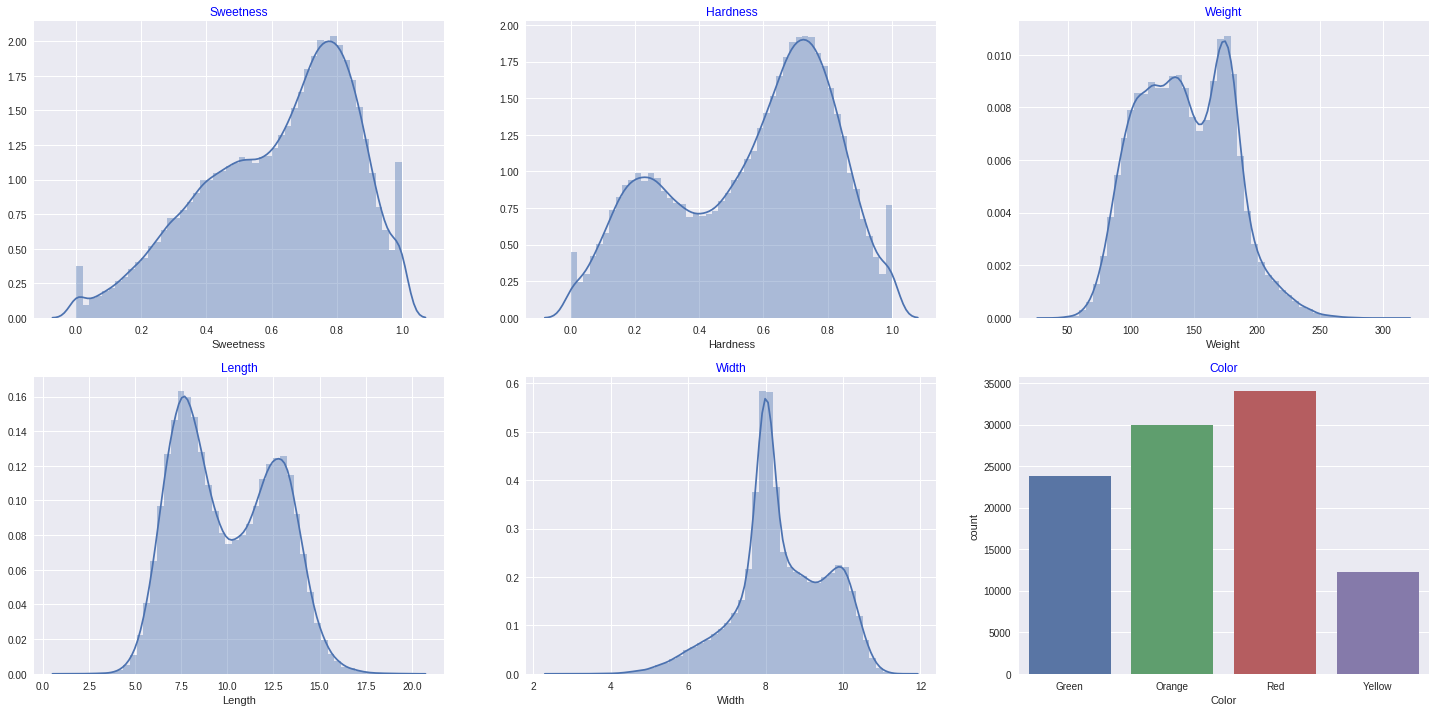

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,12))
plt.subplot(2,3,1)
plt.title('Sweetness',color = "b")
sns.distplot(df['Sweetness'])
plt.subplot(2,3,2)
plt.title('Hardness',color = "b")
sns.distplot(df['Hardness'])
plt.subplot(2,3,3)
plt.title('Weight',color = "b")
sns.distplot(df['Weight'])
plt.subplot(2,3,4)
plt.title('Length',color = "b")
sns.distplot(df['Length'])
plt.subplot(2,3,5)
plt.title('Width',color = "b")
sns.distplot(df['Width'])
plt.subplot(2,3,6)
plt.title('Color',color = "b")
sns.countplot(x="Color", data=df);

Finally we can explore and compare the statistics of specific fruits|

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


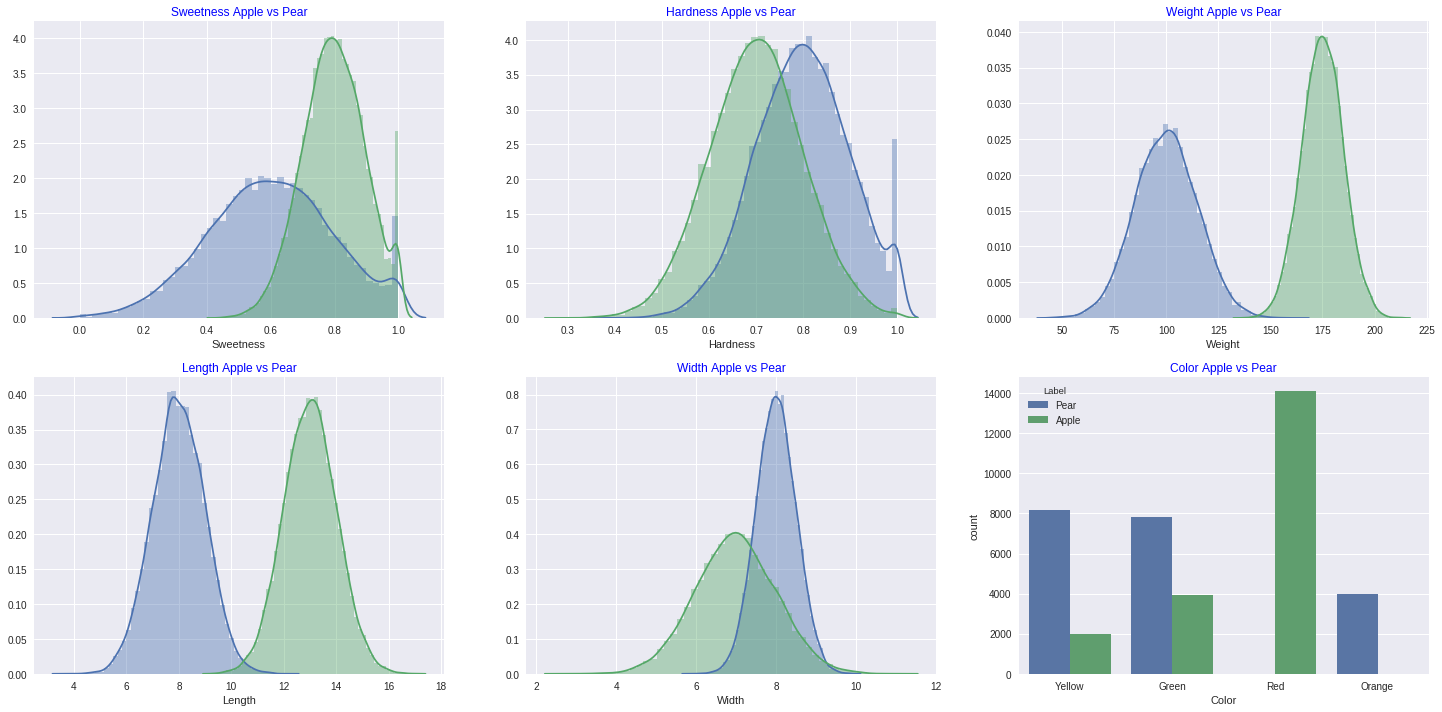

In [26]:
fruit1 = 'Apple'
fruit2 = 'Pear'

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,12))
plt.subplot(2,3,1)
plt.title('Sweetness Apple vs Pear',color = "b")
sns.distplot(df[df['Label']==fruit1]['Sweetness'])
sns.distplot(df[df['Label']==fruit2]['Sweetness'])
plt.subplot(2,3,2)
plt.title('Hardness Apple vs Pear',color = "b")
sns.distplot(df[df['Label']==fruit1]['Hardness'])
sns.distplot(df[df['Label']==fruit2]['Hardness'])
plt.subplot(2,3,3)
plt.title('Weight Apple vs Pear',color = "b")
sns.distplot(df[df['Label']==fruit1]['Weight'])
sns.distplot(df[df['Label']==fruit2]['Weight'])
plt.subplot(2,3,4)
plt.title('Length Apple vs Pear',color = "b")
sns.distplot(df[df['Label']==fruit1]['Length'])
sns.distplot(df[df['Label']==fruit2]['Length'])
plt.subplot(2,3,5)
plt.title('Width Apple vs Pear',color = "b")
sns.distplot(df[df['Label']==fruit1]['Width'])
sns.distplot(df[df['Label']==fruit2]['Width'])
plt.subplot(2,3,6)
plt.title('Color Apple vs Pear',color = "b")
sns.countplot(x="Color", hue="Label", data=df[(df['Label']==fruit1) | (df['Label']==fruit2)]);

# Making a classifier

We will build a function that will act as our classifier. The function receives 3 inputs:  
- The training set (df_train)
- The test set (df_test)
- The names of the features that we want to use when building the classifier

The function builds a naive bayes classifier using the given training set and the selected features. Then function returns:
- The probability of each datapoint to belong to each class
- The assigned class (the one with the highest probability)
- The total accuracy of the classifier

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

def bayesClassifier(df_train, df_test, features):
  
  # Filter train and test sets by the selected features 
  df_train_filtered = df_train[features]
  df_test_filtered = df_test[features]
  
  # Split each of the train and test sets by datatype
  df_train_1 = df_train_filtered.select_dtypes(exclude = 'object')
  df_train_2 = df_train_filtered.select_dtypes(include = 'object')
  df_test_1 = df_test_filtered.select_dtypes(exclude = 'object')
  df_test_2 = df_test_filtered.select_dtypes(include = 'object')
    
  # Construct the new train set with dummy variables
  if df_train_2.empty:
    new_df_train = df_train_1
  else:
    dummies = pd.get_dummies(df_train_2)
    new_df_train = pd.concat([df_train_1, dummies], axis=1)
  
  # Construct the new test set with dummy variables
  if df_test_2.empty:
    new_df_test = df_test_1
  else:
    dummies = pd.get_dummies(df_test_2)
    new_df_test = pd.concat([df_test_1, dummies], axis=1)
  
  # Split between X and Y
  X_train = new_df_train
  Y_train = df_train['Label']
  X_test = new_df_test
  Y_test = df_test['Label']
  
  # Build classifier, train and predict probabilities, assign classes and measure performance
  GaussNB = GaussianNB()
  GaussNB.fit(X_train, Y_train)
  Y_pred_proba = GaussNB.predict_proba(X_test)
  Y_pred = GaussNB.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
    
  return Y_pred_proba, Y_pred, accuracy

# Splitting Train and Test set

We take 20% of the 100.000 datapoints and use it as a test set. The other 80% will be used as the training set.

In [0]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Using different features and measuring performance

Here we will run the classifier over the test set using the entire datapoints of the training set to build it but with different features each time. This way we can evaluate the importance of each feature and the performance improvement of adding new features to the classifier. Specifically we will run all the possible combinations of the 6 features and evaluate each time.

In [0]:
features = ['Sweetness', 'Hardness', 'Weight', 'Length', 'Width', 'Color']

import itertools
acc = []
sizeComb = []
for i in range(1,7):
  caca = itertools.combinations(features, i)
  for comb in list(caca):
    comb = list(comb)
    sizeComb.append(len(comb))  
    a,b,res = bayesClassifier(df_train, df_test, comb)
    acc.append(res)

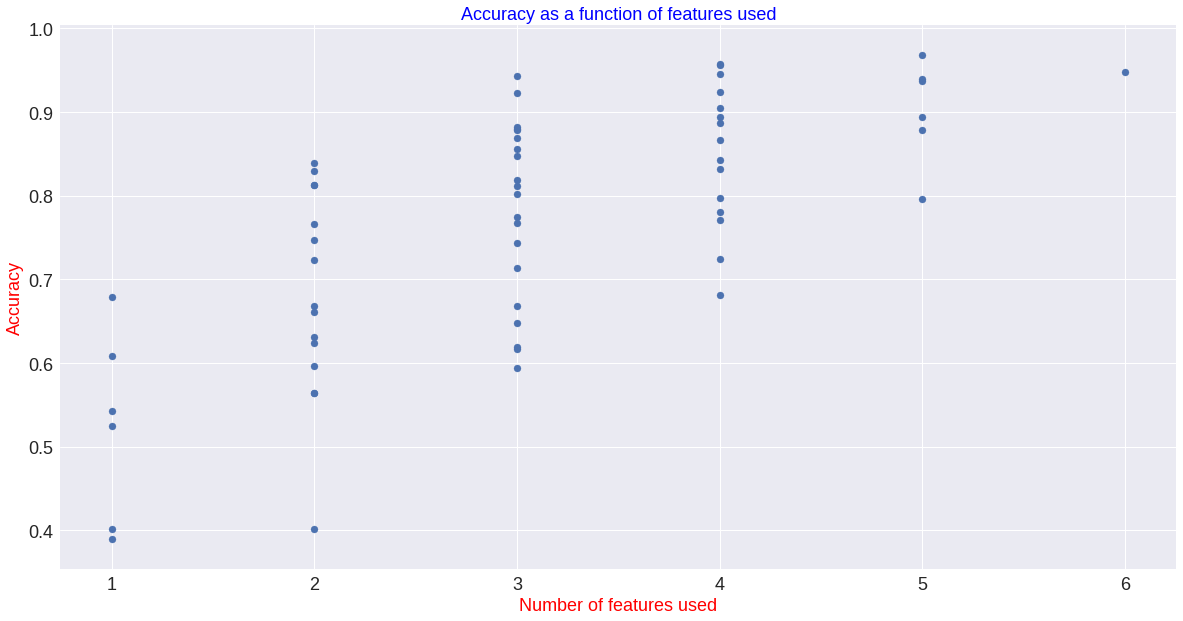

In [30]:
plt.figure(figsize = (20,10))
plt.scatter(np.asarray(sizeComb), np.asarray(acc))
plt.ylabel('Accuracy', fontsize=18, color = 'r')
plt.xlabel('Number of features used', fontsize=18, color = 'r');
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Accuracy as a function of features used', fontsize = 18, color='b');

First of all we see that when using all 6 feaetures we achieve a performance of about 95%. Let's check which feature is more succesful when used alone:

In [31]:
features = ['Sweetness', 'Hardness', 'Weight', 'Length', 'Width', 'Color']
acc[0:6]

for i in range(0,6):
  print (features[i] + ' : ' + str(acc[i]))

Sweetness : 0.39005
Hardness : 0.52445
Weight : 0.60865
Length : 0.5427
Width : 0.67945
Color : 0.4013


So from less predictive to most predictive we have:
- Sweetness
- Color
- Hardness
- Length
- Weight
- Width

# Measuring the information gain when adding new features

Our classifier returns a probability vector for each datapoint. The best case scenario is when our classifier returns a probability of 1 for one of the 5 classes and a probability of 0 for the rest of the classes. We can measure how "sure" the classifier is on his prediction by measuring the entropy of the probability vector. If we average the entropy of all the datapoints of the test set we get a measure of how sure the classifier is while classifying.   

We can then compare the average entropy of a classifier to the average entropy of another classifier with, for example, more features.  The difference in the entropies represents the information gain.

In [0]:
# General function to measure information gain between 2 discrete distribution vectors

import numpy as np

def entropy(probMatrix):
  probdf = pd.DataFrame(data=probMatrix)
  entr = probdf.apply(lambda x: x*np.log(x))
  rowSum = -entr.sum(axis=1)
  return np.mean(rowSum)  
  
def informationGain(entropy1, entropy2):
  infGain = entropy1-entropy2
  return infGain

Let's now look at all the possible ways to order the features and measure the information gain along that specific path. First we analyze the feature with the less entropy and then we add one by one and choose the one with the most information gain. We will leave the feature Color out of the analysis since it's one-hot encoded.

In [33]:
features = ['Sweetness', 'Hardness', 'Weight', 'Length', 'Width']
caca = itertools.combinations(features, 1)
for comb in list(caca):
  probFcn,a,b = bayesClassifier(df_train, df_test, list(comb))
  ent = entropy(probFcn)
  print(ent)

1.2433027686319773
1.0584738940718572
0.8799856384540184
0.9967229892095475
0.7575089122244443


We see that from low entropy to high entropy we have:
- Width
- Weight
- Length
- Hardness
- Sweetness

So we begin with 'Width'. Once we have Width who else should we add?

In [34]:
fixed = ['Width', 'provisory']
features = ['Sweetness', 'Hardness', 'Weight', 'Length']
caca = itertools.combinations(features, 1)
for comb in list(caca):
  fixed[1] = list(comb)[0]
  probFcn,a,b = bayesClassifier(df_train, df_test, fixed)
  ent = entropy(probFcn)
  print(ent)

0.5423417483761572
0.4235465451633425
0.3686768012547614
0.4232139624133106


So in second place we get that we should look at Weight

In [35]:
fixed = ['Width', 'Weight', 'provisory']
features = ['Sweetness', 'Hardness', 'Length']
caca = itertools.combinations(features, 1)
for comb in list(caca):
  fixed[2] = list(comb)[0]
  probFcn,a,b = bayesClassifier(df_train, df_test, fixed)
  ent = entropy(probFcn)
  print(ent)

0.28564928360222547
0.14737236898956435
0.27978000035933837


Next in line is then 'Hardness'

In [36]:
fixed = ['Width', 'Weight', 'Hardness', 'provisory']
features = ['Sweetness', 'Length']
caca = itertools.combinations(features, 1)
for comb in list(caca):
  fixed[3] = list(comb)[0]
  probFcn,a,b = bayesClassifier(df_train, df_test, fixed)
  ent = entropy(probFcn)
  print(ent)

0.10670626724494459
0.1096333859447637


And the final two are Sweetness and then Length.  

So, our optimal order is:
- Width
- Weight
- Hardness
- Length
- Sweetness

# Curiosity: comparing learning processes

We now compare the step-entropy and information gain of the optimal curiosity process and another not optimal process

In [37]:
import scipy
entropy_vector1 = []
information_vector1 = [0]
optimalOrder = ['Width', 'Weight', 'Hardness', 'Length', 'Sweetness']
initial_entropy = scipy.stats.entropy([1/5,1/5,1/5,1/5,1/5])
entropy_vector1.append(initial_entropy)
print('Initial Entropy: ' + str(initial_entropy))
for i in range(1,6):
  featur = optimalOrder[0:i]
  probFcn,a,b = bayesClassifier(df_train, df_test, featur)
  ent = entropy(probFcn)
  infGain = informationGain(initial_entropy, ent)
  information_vector1.append(infGain)
  print('The information gain of using features: ' + ' & '.join(featur) + ' is ' + str(np.around(infGain,4)))
  print ('Entropy after using features: ' + ' & '.join(featur) + ' is ' + str(np.around(ent,4)))
  initial_entropy = ent
  entropy_vector1.append(initial_entropy)

Initial Entropy: 1.6094379124341005
The information gain of using features: Width is 0.8519
Entropy after using features: Width is 0.7575
The information gain of using features: Width & Weight is 0.3888
Entropy after using features: Width & Weight is 0.3687
The information gain of using features: Width & Weight & Hardness is 0.2213
Entropy after using features: Width & Weight & Hardness is 0.1474
The information gain of using features: Width & Weight & Hardness & Length is 0.0377
Entropy after using features: Width & Weight & Hardness & Length is 0.1096
The information gain of using features: Width & Weight & Hardness & Length & Sweetness is 0.0278
Entropy after using features: Width & Weight & Hardness & Length & Sweetness is 0.0819


Let's compare that to another features order:

In [38]:
entropy_vector2 = []
information_vector2 = [0]
notOptimalOrder = ['Sweetness', 'Length', 'Hardness', 'Weight', 'Width']
initial_entropy = scipy.stats.entropy([1/5,1/5,1/5,1/5,1/5])
entropy_vector2.append(initial_entropy)
print('Initial Entropy: ' + str(initial_entropy))
for i in range(1,6):
  featur = notOptimalOrder[0:i]
  probFcn,a,b = bayesClassifier(df_train, df_test, featur)
  ent = entropy(probFcn)
  infGain = informationGain(initial_entropy, ent)
  information_vector2.append(infGain)
  print('The information gain of using features: ' + ' & '.join(featur) + ' is ' + str(np.around(infGain,4)))
  print ('Entropy after using features: ' + ' & '.join(featur) + ' is ' + str(np.around(ent,4)))
  initial_entropy = ent
  entropy_vector2.append(initial_entropy)

Initial Entropy: 1.6094379124341005
The information gain of using features: Sweetness is 0.3661
Entropy after using features: Sweetness is 1.2433
The information gain of using features: Sweetness & Length is 0.4288
Entropy after using features: Sweetness & Length is 0.8145
The information gain of using features: Sweetness & Length & Hardness is 0.3497
Entropy after using features: Sweetness & Length & Hardness is 0.4648
The information gain of using features: Sweetness & Length & Hardness & Weight is 0.203
Entropy after using features: Sweetness & Length & Hardness & Weight is 0.2619
The information gain of using features: Sweetness & Length & Hardness & Weight & Width is 0.18
Entropy after using features: Sweetness & Length & Hardness & Weight & Width is 0.0819


We see that in both cases we start with the same entropy and we end with the same entropy, but the process, the step-entropies and the information gain are very different.. Let's plot them:

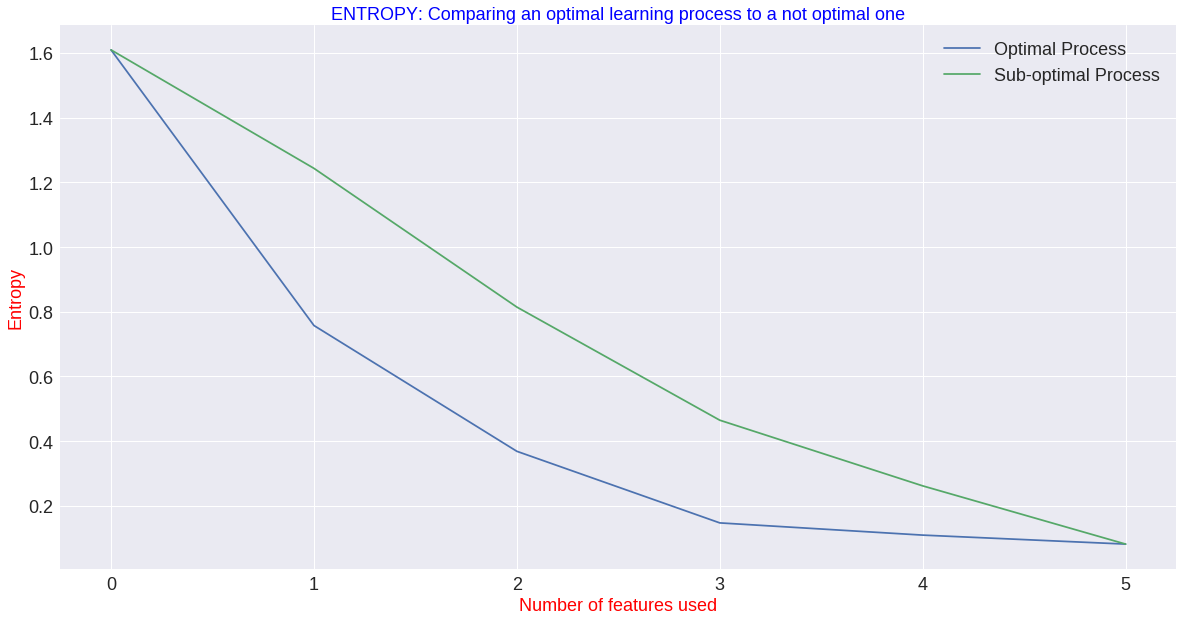

In [39]:
plt.figure(figsize = (20,10))
plt.ylabel('Entropy', fontsize=18, color = 'r')
plt.xlabel('Number of features used', fontsize=18, color = 'r');
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('ENTROPY: Comparing an optimal learning process to a not optimal one', fontsize = 18, color='b');
plt.plot(entropy_vector1)
plt.plot(entropy_vector2)
plt.legend(['Optimal Process', 'Sub-optimal Process'], fontsize = 18);

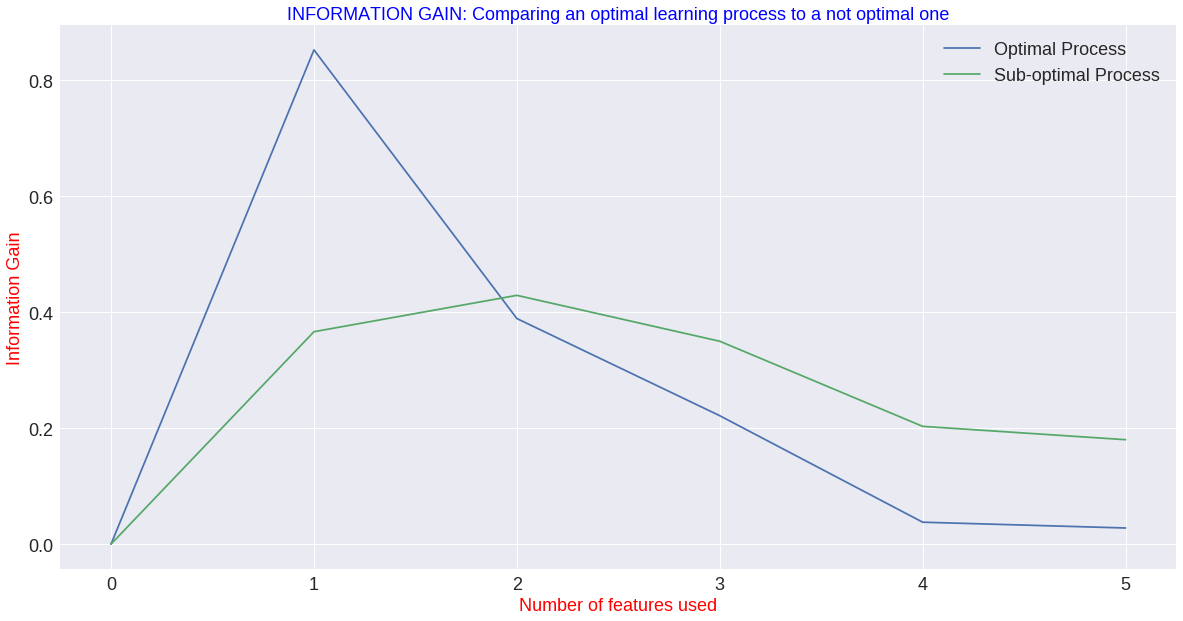

In [40]:
plt.figure(figsize = (20,10))
plt.ylabel('Information Gain', fontsize=18, color = 'r')
plt.xlabel('Number of features used', fontsize=18, color = 'r');
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('INFORMATION GAIN: Comparing an optimal learning process to a not optimal one', fontsize = 18, color='b');
plt.plot(information_vector1)
plt.plot(information_vector2)
plt.legend(['Optimal Process', 'Sub-optimal Process'], fontsize = 18);

# Conclusions

In this notebook we succesfully explored the performance and dynamics of a Naive Bayes classifier. We measured the performance of the classifier while using some and all the available features. Also, we were able to understand the different learning processes in the context of curiosity by looking at the entropy and information gain when adding the features in different orders.  

We succesfully identified the optimal learning process, the one that maximizes information gain in each step compared to any other learning process.